In [265]:
import os
os.chdir(os.getcwd())

# Import Module

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
from sklearn.cluster import KMeans

import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('../thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')


# Import Data 

In [267]:
# Code
df = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564')
df.tail()

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
28,หน่วยงานอื่นของรัฐ,-,-,-,563.2,-,563.2
29,สภากาชาดไทย,-,-,-,8871.6,-,8871.6
30,ส่วนราชการในพระองค์,-,-,-,8980.9,-,8980.9
31,ทุนหมุนเวียน,-,-,-,19916.6,203108.1,223024.7
32,รวมทั้งสิ้น,641434.7,234204.2,500113.7,1117797.4,792412.5,3285962.5


# Part 1

ใช้งบประมาณรายจ่ายส่วนย่อย 5 ด้าน ในปี 2564 จัดกลุ่มกระทรวงตามงบประมาณรายจ่าย ด้วยวิธี K-mean, Hierarchical และ DBScan   ในแต่ละวิธี  ให้เหตุผลในการเลือก ค่า parameter ในการทำ clustering   ระบุว่า วิธีใด ให้ผลลัพธ์ Clustering ที่ดีที่สุด อภิปรายเหตุผล ว่า เพราะเหตุใดจึงเป็นเช่นนั้่น

# K-mean

In [268]:
k_mean_data_2564 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564').drop([0,21,22,23,24,25,26,27,28,29,30,31,32]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
k_mean_data_2564

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,4104.5,3078.3,6104.3,12397.0,13606.8
2,91027.4,24102.9,14426.1,4794.4,80179.8
3,12988.2,6567.9,3421.2,599.4,244863.5
4,2697.3,2509.6,397.5,1348.7,1203.3
5,1572.6,892.1,1564.4,735.9,1327.7
6,2746.6,2519.3,397.8,16598.3,79.8
7,11248.4,939.9,9956.4,104384.6,1597.7
8,24376.6,11495.8,72292.8,2001.1,564.8
9,9704.7,2436.2,177009.1,57.1,751.6
10,1311.6,2009.9,1243.4,1945.8,1791.0


In [269]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_data_2564)
k_mean_data_2564_normalized = pd.DataFrame(array_normalized)
k_mean_data_2564_normalized.head()

,0,1,2,3,4
0,-0.434334,-0.456270,-0.323200,-0.261830,-0.106436
1,1.200658,2.655987,-0.115004,-0.396245,1.110209
2,-0.267235,0.060293,-0.390326,-0.470413,4.119859
3,-0.460803,-0.540454,-0.465973,-0.457166,-0.333114
4,-0.481959,-0.779892,-0.436780,-0.468000,-0.330840


Text(0, 0.5, 'SSE')

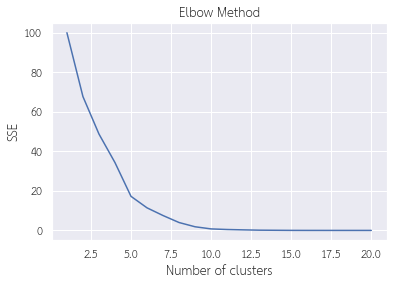

In [270]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_data_2564_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [271]:
k=5
# เพราะเป็นค่า Number of cluster ที่่ให้ความชันมากที่สุด

In [272]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(k_mean_data_2564_normalized)

KMeans(n_clusters=5)

In [273]:
cluster_predictions = kmeans.predict(k_mean_data_2564_normalized)
k_mean_data_2564['cluster_id'] = cluster_predictions
k_mean_data_2564

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,4104.5,3078.3,6104.3,12397.0,13606.8,0
2,91027.4,24102.9,14426.1,4794.4,80179.8,1
3,12988.2,6567.9,3421.2,599.4,244863.5,4
4,2697.3,2509.6,397.5,1348.7,1203.3,0
5,1572.6,892.1,1564.4,735.9,1327.7,0
6,2746.6,2519.3,397.8,16598.3,79.8,0
7,11248.4,939.9,9956.4,104384.6,1597.7,0
8,24376.6,11495.8,72292.8,2001.1,564.8,0
9,9704.7,2436.2,177009.1,57.1,751.6,3
10,1311.6,2009.9,1243.4,1945.8,1791.0,0


In [274]:
k_mean_data_2564.cluster_id.value_counts()

0    14
1     3
4     1
3     1
2     1
Name: cluster_id, dtype: int64

In [275]:
print(metrics.silhouette_score(k_mean_data_2564,kmeans.labels_))
'''

    I.   S (i)ใกล้กับ 0 หมายความว่าจุดอยู่ระหว่างสองคลัสเตอร์
    II.  ถ้ามันใกล้ -1 มากขึ้นเราก็ควรกำหนดให้กับคลัสเตอร์อื่นดีกว่า
    III. ถ้าS (i)อยู่ใกล้ 1 แสดงว่าจุดนั้นเป็นของคลัสเตอร์ "ถูกต้อง"

'''

0.5273282629951688


'\n\n    I.   S (i)ใกล้กับ 0 หมายความว่าจุดอยู่ระหว่างสองคลัสเตอร์\n    II.  ถ้ามันใกล้ -1 มากขึ้นเราก็ควรกำหนดให้กับคลัสเตอร์อื่นดีกว่า\n    III. ถ้าS (i)อยู่ใกล้ 1 แสดงว่าจุดนั้นเป็นของคลัสเตอร์ "ถูกต้อง"\n\n'

In [276]:
print(metrics.davies_bouldin_score(k_mean_data_2564,kmeans.labels_))
# ยิ่งมีค่าน่อยยิ่งดี

0.4940316543468324


# Hierarchical

In [277]:
Hierarchical_data_2564 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564').drop([0,21,22,23,24,25,26,27,28,29,30,31,32]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
Hierarchical_data_2564

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,4104.5,3078.3,6104.3,12397.0,13606.8
2,91027.4,24102.9,14426.1,4794.4,80179.8
3,12988.2,6567.9,3421.2,599.4,244863.5
4,2697.3,2509.6,397.5,1348.7,1203.3
5,1572.6,892.1,1564.4,735.9,1327.7
6,2746.6,2519.3,397.8,16598.3,79.8
7,11248.4,939.9,9956.4,104384.6,1597.7
8,24376.6,11495.8,72292.8,2001.1,564.8
9,9704.7,2436.2,177009.1,57.1,751.6
10,1311.6,2009.9,1243.4,1945.8,1791.0


In [278]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(Hierarchical_data_2564)
Hierarchical_data_2564_normalized = pd.DataFrame(array_normalized)
Hierarchical_data_2564_normalized.head()

,0,1,2,3,4
0,-0.434334,-0.456270,-0.323200,-0.261830,-0.106436
1,1.200658,2.655987,-0.115004,-0.396245,1.110209
2,-0.267235,0.060293,-0.390326,-0.470413,4.119859
3,-0.460803,-0.540454,-0.465973,-0.457166,-0.333114
4,-0.481959,-0.779892,-0.436780,-0.468000,-0.330840


In [279]:
# Set up parameter values
linkage_val = 'average'  # 'others are 'complete', 'single', 'ward'
dist_threshold_val = 0   # Set to be zero to plot dendrogram
nclusters_val = None     # if distance_threshold is 0, this must be None

In [280]:
model=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model=model.fit(Hierarchical_data_2564_normalized)
model

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

In [281]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

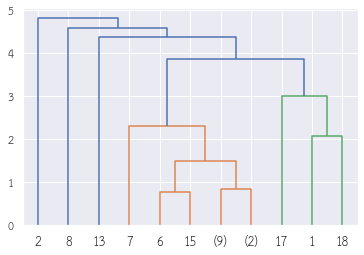

In [282]:
plot_dendrogram(model, truncate_mode='level', p=6)
#เลือก p=6 เพราะว่าหากเลือกต่ำกว่านี้จะไม่มีผลกับเลขจำนวนเต็ม

In [283]:
dist_threshold_val = 2
nclusters_val = None
#เลือก 2 เพราะว่าหากมากกว่านี้จะได้ค่า dist_threshold_val ต่ำกว่า 1

In [284]:
model=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model=model.fit(Hierarchical_data_2564_normalized)
model

AgglomerativeClustering(distance_threshold=2, linkage='average',
                        n_clusters=None)

In [285]:
labels = model.labels_
labels

array([0, 7, 3, 0, 0, 0, 0, 6, 5, 0, 0, 0, 0, 4, 0, 0, 0, 2, 1, 0],
      dtype=int64)

In [286]:
cluster_ids = pd.Series(labels).unique()
cluster_ids 

array([0, 7, 3, 6, 5, 4, 2, 1], dtype=int64)

In [287]:
cluster_predictions = model_H1.fit_predict(Hierarchical_data_2564_normalized)
Hierarchical_data_2564['cluster_id'] = cluster_predictions
Hierarchical_data_2564.tail(10)

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
11,10992.6,5199.8,10408.8,1103.6,1630.9,0
12,822.0,531.2,707.8,30.7,187.5,0
13,2216.4,1585.4,845.4,479.5,1698.8,0
14,19360.2,12718.1,38441.4,235503.6,28464.4,4
15,10363.6,8775.0,3333.1,1937.6,2418.8,0
16,3671.6,1375.7,375.7,63712.9,584.4,1
17,2321.9,1430.5,2325.4,1070.7,814.4,0
18,223199.6,20029.5,19437.0,88628.9,5154.7,2
19,107548.0,14411.4,17025.5,6637.5,179.9,3
20,1635.9,603.4,745.8,157.9,1516.2,0


In [288]:
print(metrics.silhouette_score(Hierarchical_data_2564,labels))

0.4147178197630107


In [289]:
print(metrics.davies_bouldin_score(Hierarchical_data_2564,model.labels_))

0.18039465206394512


# DBScan

In [290]:
DBScan_data_2564 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564').drop([0,21,22,23,24,25,26,27,28,29,30,31,32]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
DBScan_data_2564

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,4104.5,3078.3,6104.3,12397.0,13606.8
2,91027.4,24102.9,14426.1,4794.4,80179.8
3,12988.2,6567.9,3421.2,599.4,244863.5
4,2697.3,2509.6,397.5,1348.7,1203.3
5,1572.6,892.1,1564.4,735.9,1327.7
6,2746.6,2519.3,397.8,16598.3,79.8
7,11248.4,939.9,9956.4,104384.6,1597.7
8,24376.6,11495.8,72292.8,2001.1,564.8
9,9704.7,2436.2,177009.1,57.1,751.6
10,1311.6,2009.9,1243.4,1945.8,1791.0


In [291]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(DBScan_data_2564)
DBScan_data_2564_normalized = pd.DataFrame(array_normalized)
DBScan_data_2564_normalized.head()

,0,1,2,3,4
0,-0.434334,-0.456270,-0.323200,-0.261830,-0.106436
1,1.200658,2.655987,-0.115004,-0.396245,1.110209
2,-0.267235,0.060293,-0.390326,-0.470413,4.119859
3,-0.460803,-0.540454,-0.465973,-0.457166,-0.333114
4,-0.481959,-0.779892,-0.436780,-0.468000,-0.330840


In [292]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbor_model = neighbors.fit(DBScan_data_2564_normalized)
distances, indices = neighbor_model.kneighbors(DBScan_data_2564_normalized)
distances

array([[0.        , 0.30742844],
       [0.        , 2.07304746],
       [0.        , 4.24636778],
       [0.        , 0.08261737],
       [0.        , 0.04861594],
       [0.        , 0.27040136],
       [0.        , 0.77417461],
       [0.        , 1.79144992],
       [0.        , 2.95621947],
       [0.        , 0.07079815],
       [0.        , 0.46343997],
       [0.        , 0.0307278 ],
       [0.        , 0.04765692],
       [0.        , 3.03086549],
       [0.        , 0.55856078],
       [0.        , 0.77417461],
       [0.        , 0.04765692],
       [0.        , 2.74539142],
       [0.        , 2.04051061],
       [0.        , 0.0307278 ]])

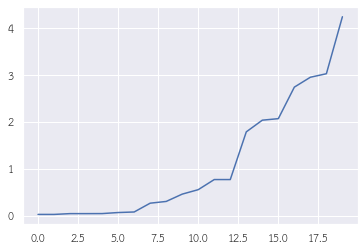

In [293]:
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])

In [294]:
# Choose value for eps and min_samples
eps_value = 3.5
min_sample_value = 4

In [295]:
dbscan=DBSCAN(eps=eps_value,min_samples=min_sample_value)
model=dbscan.fit(DBScan_data_2564_normalized)

In [296]:
labels = model.labels_
labels

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0], dtype=int64)

In [297]:
cluster_ids = pd.Series(labels).unique()
cluster_ids 

array([ 0, -1], dtype=int64)

In [298]:
n_clusters=len(cluster_ids)-1   # -1 = noise
n_clusters

1

In [299]:
cluster_predictions = dbscan.fit_predict(Hierarchical_data_2564_normalized)
Hierarchical_data_2564['cluster_id'] = cluster_predictions
Hierarchical_data_2564.tail(10)

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
11,10992.6,5199.8,10408.8,1103.6,1630.9,0
12,822.0,531.2,707.8,30.7,187.5,0
13,2216.4,1585.4,845.4,479.5,1698.8,0
14,19360.2,12718.1,38441.4,235503.6,28464.4,0
15,10363.6,8775.0,3333.1,1937.6,2418.8,0
16,3671.6,1375.7,375.7,63712.9,584.4,0
17,2321.9,1430.5,2325.4,1070.7,814.4,0
18,223199.6,20029.5,19437.0,88628.9,5154.7,0
19,107548.0,14411.4,17025.5,6637.5,179.9,0
20,1635.9,603.4,745.8,157.9,1516.2,0


In [300]:
print(metrics.silhouette_score(Hierarchical_data_2564,labels))

0.5756583636165525


In [301]:
print(metrics.davies_bouldin_score(Hierarchical_data_2564,model.labels_))

0.303951799985643


# Part 2

ใช้งบประมาณรายจ่ายส่วนย่อย 5 ด้าน ในปี 2560-2564  จัดกลุ่มกระทรวงตามงบประมาณรายจ่าย แยกตามปี (ไม่รวมทุกปีเข้าด้วยกัน)  ด้วยวิธี K-mean


In [302]:
'''

    2560

'''

'\n\n    2560\n\n'

In [303]:
k_mean_data_2560 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2560').drop([0,21,22,23,24,25,26,27,28,29,30]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
k_mean_data_2560

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,3894.0,2853.3,4777.3,9458.4,14429.3
2,90837.3,25772.7,8398.4,3536.4,84905.1
3,12014.6,6188.9,3343.7,238.8,195927.6
4,2997.4,2590.2,604.2,1147.2,1370.6
5,1424.4,1113.7,1658.1,405.3,1946.9
6,2667.9,3401.0,952.7,4419.3,219.1
7,25027.8,14022.7,46346.7,1952.3,917.9
8,9248.9,2344.5,137892.7,462.3,801.6
9,10468.6,6712.3,12880.3,2224.8,1435.0
10,1164.5,809.1,978.4,2263.6,2468.6


In [304]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_data_2560)
k_mean_data_2560_normalized = pd.DataFrame(array_normalized)
k_mean_data_2560_normalized.head()


,0,1,2,3,4
0,-0.395078,-0.470021,-0.344301,-0.251257,-0.069280
1,1.080991,1.981045,-0.227101,-0.344663,1.496412
2,-0.257211,-0.113303,-0.390701,-0.396675,3.962891
3,-0.410300,-0.498158,-0.479367,-0.382347,-0.359393
4,-0.437005,-0.656059,-0.445257,-0.394049,-0.346590


Text(0, 0.5, 'SSE')

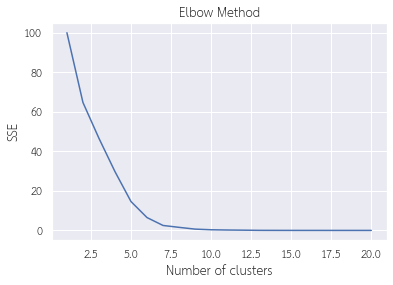

In [305]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_data_2560_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [306]:
k=4
# เพราะเป็นค่า Number of cluster ที่่ให้ความชันมากที่สุด

In [307]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(k_mean_data_2560_normalized)

KMeans(n_clusters=4)

In [308]:
cluster_predictions = kmeans.predict(k_mean_data_2560_normalized)
k_mean_data_2560['cluster_id'] = cluster_predictions
k_mean_data_2560

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,3894.0,2853.3,4777.3,9458.4,14429.3,0
2,90837.3,25772.7,8398.4,3536.4,84905.1,3
3,12014.6,6188.9,3343.7,238.8,195927.6,3
4,2997.4,2590.2,604.2,1147.2,1370.6,0
5,1424.4,1113.7,1658.1,405.3,1946.9,0
6,2667.9,3401.0,952.7,4419.3,219.1,0
7,25027.8,14022.7,46346.7,1952.3,917.9,0
8,9248.9,2344.5,137892.7,462.3,801.6,2
9,10468.6,6712.3,12880.3,2224.8,1435.0,0
10,1164.5,809.1,978.4,2263.6,2468.6,0


In [309]:
k_mean_data_2560.cluster_id.value_counts()

0    16
3     2
2     1
1     1
Name: cluster_id, dtype: int64

In [310]:
print(metrics.silhouette_score(k_mean_data_2560,kmeans.labels_))

0.5215674057710994


In [311]:
print(metrics.davies_bouldin_score(k_mean_data_2560,kmeans.labels_))

0.5203140805929345


In [312]:
'''

    2561

'''

'\n\n    2561\n\n'

In [313]:
k_mean_data_2561 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2561').drop([0,21,22,23,24,25,26,27,28,29,30]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
k_mean_data_2561

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,3941.3,2770.8,3682.2,9474.7,14005.7
2,91153.1,25039.5,9544.1,6610.7,88176.3
3,12235.8,6177.6,3177.1,89.2,216561.9
4,3045.3,2534.2,574.0,1182.7,1425.3
5,1342.8,1107.3,1911.2,340.1,1921.5
6,2652.9,3542.9,1383.2,5951.5,187.0
7,25019.6,15538.5,55276.8,3139.3,856.5
8,9492.6,2308.9,156059.3,268.4,638.8
9,1163.7,1163.4,1379.2,2587.1,277.8
10,10632.0,6284.7,12447.3,2493.2,1787.5


In [314]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_data_2561)
k_mean_data_2561_normalized = pd.DataFrame(array_normalized)
k_mean_data_2561_normalized.head()

,0,1,2,3,4
0,-0.400287,-0.491456,-0.382696,-0.263163,-0.093725
1,1.113194,2.038018,-0.214987,-0.305846,1.407207
2,-0.256344,-0.104482,-0.397147,-0.403037,4.005245
3,-0.415836,-0.518331,-0.471622,-0.386741,-0.348305
4,-0.445382,-0.680411,-0.433365,-0.399298,-0.338263


Text(0, 0.5, 'SSE')

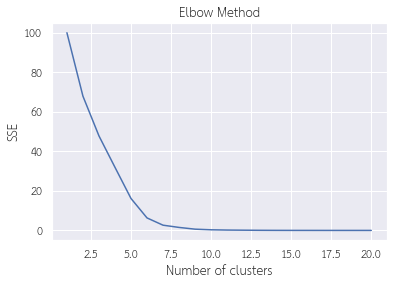

In [315]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_data_2561_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')


In [316]:
k=4
# เพราะเป็นค่า Number of cluster ที่่ให้ความชันมากที่สุด

In [317]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(k_mean_data_2561_normalized)

KMeans(n_clusters=4)

In [318]:
cluster_predictions = kmeans.predict(k_mean_data_2561_normalized)
k_mean_data_2561['cluster_id'] = cluster_predictions
k_mean_data_2561

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,3941.3,2770.8,3682.2,9474.7,14005.7,1
2,91153.1,25039.5,9544.1,6610.7,88176.3,1
3,12235.8,6177.6,3177.1,89.2,216561.9,0
4,3045.3,2534.2,574.0,1182.7,1425.3,1
5,1342.8,1107.3,1911.2,340.1,1921.5,1
6,2652.9,3542.9,1383.2,5951.5,187.0,1
7,25019.6,15538.5,55276.8,3139.3,856.5,1
8,9492.6,2308.9,156059.3,268.4,638.8,2
9,1163.7,1163.4,1379.2,2587.1,277.8,1
10,10632.0,6284.7,12447.3,2493.2,1787.5,1


In [319]:
k_mean_data_2561.cluster_id.value_counts()

1    16
3     2
0     1
2     1
Name: cluster_id, dtype: int64

In [320]:
print(metrics.silhouette_score(k_mean_data_2561,kmeans.labels_))

0.5854378664957427


In [321]:
print(metrics.davies_bouldin_score(k_mean_data_2561,kmeans.labels_))

0.5151580853301454


In [322]:
'''

    2562

'''

'\n\n    2562\n\n'

In [323]:
k_mean_data_2562 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2562').drop([0,21,22,23,24,25,26,27,28,29,30]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
k_mean_data_2562

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,3954.7,2962.6,6772.5,11813.6,15327.0
2,93590.8,24735.3,11188.3,5377.5,92234.7
3,12679.7,6433.3,3326.1,753.0,219755.9
4,2951.1,2577.8,419.5,1409.3,1839.6
5,1509.6,1111.2,1441.6,369.5,1643.1
6,2741.8,2998.5,915.5,6510.5,176.3
7,24739.8,14596.1,65676.5,2979.3,1005.2
8,9472.2,2468.7,166867.5,45.9,744.3
9,1233.6,896.1,1243.2,1773.2,267.3
10,10875.0,6189.6,11026.6,948.3,1653.1


In [324]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_data_2562)
k_mean_data_2562_normalized = pd.DataFrame(array_normalized)
k_mean_data_2562_normalized.head()

,0,1,2,3,4
0,-0.412334,-0.478227,-0.297626,-0.232150,-0.074798
1,1.203523,2.213682,-0.180440,-0.324660,1.453035
2,-0.255050,-0.049120,-0.389086,-0.391131,3.986346
3,-0.430426,-0.525802,-0.466221,-0.381698,-0.342736
4,-0.456412,-0.707128,-0.439097,-0.396644,-0.346640


Text(0, 0.5, 'SSE')

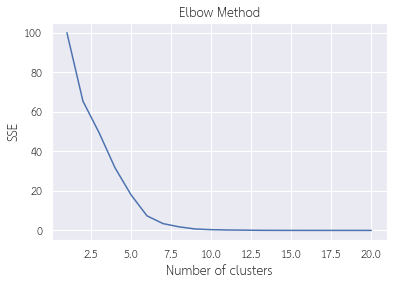

In [325]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_data_2562_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [326]:
k=5
# เพราะเป็นค่า Number of cluster ที่่ให้ความชันมากที่สุด

In [327]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(k_mean_data_2562_normalized)

KMeans(n_clusters=5)

In [328]:
cluster_predictions = kmeans.predict(k_mean_data_2562_normalized)
k_mean_data_2562['cluster_id'] = cluster_predictions
k_mean_data_2562

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,3954.7,2962.6,6772.5,11813.6,15327.0,1
2,93590.8,24735.3,11188.3,5377.5,92234.7,2
3,12679.7,6433.3,3326.1,753.0,219755.9,2
4,2951.1,2577.8,419.5,1409.3,1839.6,1
5,1509.6,1111.2,1441.6,369.5,1643.1,1
6,2741.8,2998.5,915.5,6510.5,176.3,1
7,24739.8,14596.1,65676.5,2979.3,1005.2,1
8,9472.2,2468.7,166867.5,45.9,744.3,3
9,1233.6,896.1,1243.2,1773.2,267.3,1
10,10875.0,6189.6,11026.6,948.3,1653.1,1


In [329]:
k_mean_data_2562.cluster_id.value_counts()

1    15
2     2
3     1
0     1
4     1
Name: cluster_id, dtype: int64

In [330]:
print(metrics.silhouette_score(k_mean_data_2562,kmeans.labels_))

print(metrics.davies_bouldin_score(k_mean_data_2562,kmeans.labels_))

0.5977397171132056
0.4147054920728584


In [331]:
'''

    2563

'''

'\n\n    2563\n\n'

In [332]:
k_mean_data_2563 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2563').drop([0,21,22,23,24,25,26,27,28,29,30,31,32,33]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
k_mean_data_2563

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,4076.1,3087.5,6567.2,10321.9,15056.2
2,92346.6,24777.8,15433.6,5162.5,95632.9
3,13093.2,6734.3,3108.5,873.7,225866.3
4,2754.0,2558.6,468.3,1483.9,1662.8
5,1552.5,1068.9,1315.9,740.8,1393.2
6,2745.1,2812.2,645.1,14924.3,154.9
7,11700.1,1012.7,9091.6,104146.9,1944.2
8,24706.3,13751.9,67815.5,2700.8,859.2
9,9684.5,2500.4,165887.2,59.1,708.9
10,1273.4,1517.0,1385.6,1927.9,794.0


In [333]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_data_2563)
k_mean_data_2563_normalized = pd.DataFrame(array_normalized)
k_mean_data_2563_normalized.head()

,0,1,2,3,4
0,-0.429076,-0.479867,-0.313928,-0.288389,-0.086763
1,1.207059,2.623786,-0.076730,-0.374074,1.468457
2,-0.261940,0.041952,-0.406457,-0.445300,3.982107
3,-0.453582,-0.555547,-0.477089,-0.435166,-0.345271
4,-0.475852,-0.768707,-0.454414,-0.447507,-0.350474


Text(0, 0.5, 'SSE')

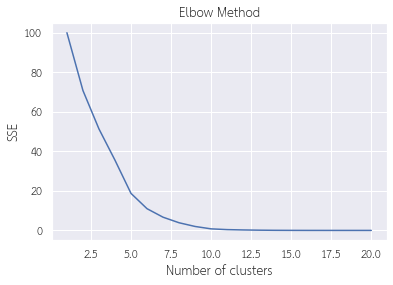

In [334]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_data_2563_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [335]:
k=5
# เพราะเป็นค่า Number of cluster ที่่ให้ความชันมากที่สุด

In [336]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(k_mean_data_2563_normalized)

KMeans(n_clusters=5)

In [337]:
cluster_predictions = kmeans.predict(k_mean_data_2563_normalized)
k_mean_data_2563['cluster_id'] = cluster_predictions
k_mean_data_2563

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,4076.1,3087.5,6567.2,10321.9,15056.2,2
2,92346.6,24777.8,15433.6,5162.5,95632.9,1
3,13093.2,6734.3,3108.5,873.7,225866.3,4
4,2754.0,2558.6,468.3,1483.9,1662.8,2
5,1552.5,1068.9,1315.9,740.8,1393.2,2
6,2745.1,2812.2,645.1,14924.3,154.9,2
7,11700.1,1012.7,9091.6,104146.9,1944.2,2
8,24706.3,13751.9,67815.5,2700.8,859.2,0
9,9684.5,2500.4,165887.2,59.1,708.9,0
10,1273.4,1517.0,1385.6,1927.9,794.0,2


In [338]:
k_mean_data_2563.cluster_id.value_counts()

2    13
1     3
0     2
4     1
3     1
Name: cluster_id, dtype: int64

In [339]:
print(metrics.silhouette_score(k_mean_data_2563,kmeans.labels_))

print(metrics.davies_bouldin_score(k_mean_data_2563,kmeans.labels_))

0.5089320697748997
0.6114812248761332


In [340]:
'''

    2564

'''

'\n\n    2564\n\n'

In [341]:
k_mean_data_2564 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564').drop([0,21,22,23,24,25,26,27,28,29,30,31,32]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
k_mean_data_2564

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,4104.5,3078.3,6104.3,12397.0,13606.8
2,91027.4,24102.9,14426.1,4794.4,80179.8
3,12988.2,6567.9,3421.2,599.4,244863.5
4,2697.3,2509.6,397.5,1348.7,1203.3
5,1572.6,892.1,1564.4,735.9,1327.7
6,2746.6,2519.3,397.8,16598.3,79.8
7,11248.4,939.9,9956.4,104384.6,1597.7
8,24376.6,11495.8,72292.8,2001.1,564.8
9,9704.7,2436.2,177009.1,57.1,751.6
10,1311.6,2009.9,1243.4,1945.8,1791.0


In [342]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_data_2564)
k_mean_data_2564_normalized = pd.DataFrame(array_normalized)
k_mean_data_2564_normalized.head()

,0,1,2,3,4
0,-0.434334,-0.456270,-0.323200,-0.261830,-0.106436
1,1.200658,2.655987,-0.115004,-0.396245,1.110209
2,-0.267235,0.060293,-0.390326,-0.470413,4.119859
3,-0.460803,-0.540454,-0.465973,-0.457166,-0.333114
4,-0.481959,-0.779892,-0.436780,-0.468000,-0.330840


Text(0, 0.5, 'SSE')

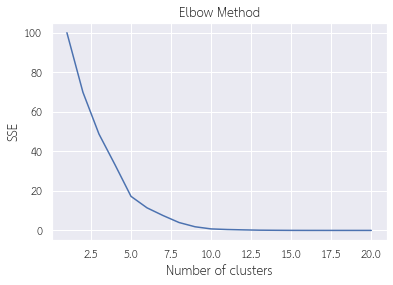

In [343]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_data_2564_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')


In [344]:
k=5
# เพราะเป็นค่า Number of cluster ที่่ให้ความชันมากที่สุด

In [345]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(k_mean_data_2564_normalized)

KMeans(n_clusters=5)

In [346]:

cluster_predictions = kmeans.predict(k_mean_data_2564_normalized)
k_mean_data_2564['cluster_id'] = cluster_predictions
k_mean_data_2564

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,4104.5,3078.3,6104.3,12397.0,13606.8,0
2,91027.4,24102.9,14426.1,4794.4,80179.8,1
3,12988.2,6567.9,3421.2,599.4,244863.5,4
4,2697.3,2509.6,397.5,1348.7,1203.3,0
5,1572.6,892.1,1564.4,735.9,1327.7,0
6,2746.6,2519.3,397.8,16598.3,79.8,0
7,11248.4,939.9,9956.4,104384.6,1597.7,0
8,24376.6,11495.8,72292.8,2001.1,564.8,0
9,9704.7,2436.2,177009.1,57.1,751.6,3
10,1311.6,2009.9,1243.4,1945.8,1791.0,0


In [347]:
k_mean_data_2564.cluster_id.value_counts()

0    14
1     3
4     1
3     1
2     1
Name: cluster_id, dtype: int64

In [348]:
print(metrics.silhouette_score(k_mean_data_2564,kmeans.labels_))

print(metrics.davies_bouldin_score(k_mean_data_2564,kmeans.labels_))

0.5273282629951688
0.4940316543468324
